# 1.Pandas的数据读写
## 1.1 数据获取-csv

    pd.read_csv(
        filepath_or_buffer: 'FilePath | ReadCsvBuffer[bytes] | ReadCsvBuffer[str]',
        sep=<no_default>,
        delimiter=None,
        header='infer',
        names=<no_default>,
        index_col=None,
        usecols=None,
        squeeze=None,
        prefix=<no_default>,
        mangle_dupe_cols=True,
        dtype: 'DtypeArg | None' = None,
        engine: 'CSVEngine | None' = None,
        converters=None,
        true_values=None,
        false_values=None,
        skipinitialspace=False,
        skiprows=None,
        skipfooter=0,
        nrows=None,
        na_values=None,
        keep_default_na=True,
        na_filter=True,
        verbose=False,
        skip_blank_lines=True,
        parse_dates=None,
        infer_datetime_format=False,
        keep_date_col=False,
        date_parser=None,
        dayfirst=False,
        cache_dates=True,
        iterator=False,
        chunksize=None,
        compression: 'CompressionOptions' = 'infer',
        thousands=None,
        decimal: 'str' = '.',
        lineterminator=None,
        quotechar='"',
        quoting=0,
        doublequote=True,
        escapechar=None,
        comment=None,
        encoding=None,
        encoding_errors: 'str | None' = 'strict',
        dialect=None,
        error_bad_lines=None,
        warn_bad_lines=None,
        on_bad_lines=None,
        delim_whitespace=False,
        low_memory=True,
        memory_map=False,
        float_precision=None,
        storage_options: 'StorageOptions' = None,
    )

In [1]:
import numpy as np
import pandas as pd

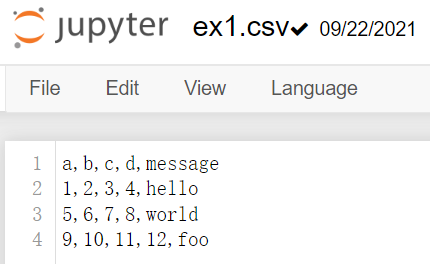

### 1.默认读取
只需要指定带路径的文件名即可  
首行会成为数据集的列名称(columns)，使用,作为分隔符，返回一个DataFrame

In [2]:
pd.read_csv('data/ex1.csv')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [3]:
type(pd.read_csv('data/ex1.csv'))

pandas.core.frame.DataFrame

In [4]:
pd.read_csv('data/ex1.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3 entries, 0 to 2
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   a        3 non-null      int64 
 1   b        3 non-null      int64 
 2   c        3 non-null      int64 
 3   d        3 non-null      int64 
 4   message  3 non-null      object
dtypes: int64(4), object(1)
memory usage: 252.0+ bytes


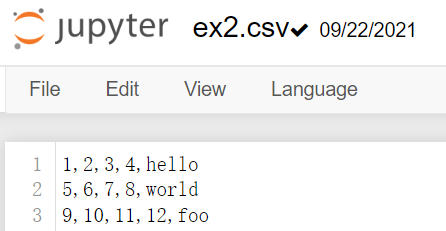

In [5]:
# 直接读取ex2.csv
pd.read_csv('data/ex2.csv')
# 会将首行数据转换为columns

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


### 2.header 设定表头信息（columns）

    header = None ,  # 不使用数据行作为列名称，直接使用位置索引作为列名称
    header = int / [int]  # 可以使用指定的行作为列索引，或者使用多行作为层次化索引

In [6]:
pd.read_csv('data/ex2.csv', header = None)

,0,1,2,3,4
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [7]:
pd.read_csv('data/ex2.csv', header = 1)
# 会将指定索引的 行作为columns，如果该行之前有数据，则会被丢弃

,5,6,7,8,world
0,9,10,11,12,foo


In [8]:
pd.read_csv('data/ex2.csv', header = [0,1])
# 同时使用多行作为列索引：层次化索引

,1,2,3,4,hello
,5,6,7,8,world
0,9,10,11,12,foo


In [9]:
pd.read_csv('data/ex2.csv', header = [0,1]).columns

MultiIndex([(    '1',     '5'),
            (    '2',     '6'),
            (    '3',     '7'),
            (    '4',     '8'),
            ('hello', 'world')],
           )

### 3.names 自定义列名称

    names = []  # 列名称或列索引的列表，使用列表中的数据作为列名称/列索引
    注意：如果names中的元素数量正好和列数量吻合，则names中的元素全部作为列名称/列索引
    如果names中的元素数量多于列数，前面的元素和数据进行匹配，后面的元素生成新的列，但引入nan
    如果names中的元素数量少于列数，后面的元素和数据匹配成为columns,前面的列成为index，如果超出的列数多于1，index会成为层次化索引

In [10]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABCDE')
)
# 使用列表中的元素代替位置索引
# 数量正好匹配

,A,B,C,D,E
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


In [11]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABCDEFG')
)
# 使用列表中的元素代替位置索引
# 列表的元素比文件的列数多，列表中靠前的元素和数据列对应，靠后的元素生成新列，用nan填充

,A,B,C,D,E,F,G
0,1,2,3,4,hello,NaN,NaN
1,5,6,7,8,world,NaN,NaN
2,9,10,11,12,foo,NaN,NaN


In [12]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABCD')
)
# 使用列表中的元素代替位置索引
# 列表的元素比文件的列数少，列表中靠后的元素和数据对应，文件中靠前的列成为index

,A,B,C,D
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [13]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABCD')
).index

Index([1, 5, 9], dtype='int64')

In [14]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABC')
)
# 使用列表中的元素代替位置索引
# 列表的元素比文件的列数少，列表中靠后的元素和数据对应，文件中靠前的列成为index，此处多余两列，就成为层次化索引

,,A,B,C
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [15]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABC')
).index

MultiIndex([(1,  2),
            (5,  6),
            (9, 10)],
           )

In [16]:
# pd.read_csv(
#     'data/ex2.csv',
#     header = None,
#     names = list('ABCDD')
# )
# 报错，names列表中不允许出现重复值

### 4.index_col 设定索引列

    index_col = 列名称 / 列位置索引 [名称/索引]
    使用指定的单列/多列作为index

In [17]:
pd.read_csv('data/ex2.csv')
# 直接读取文件，会使用位置索引作为index

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [18]:
pd.read_csv('data/ex2.csv').columns

Index(['1', '2', '3', '4', 'hello'], dtype='object')

In [19]:
# 使用hello列作为index
pd.read_csv(
    'data/ex2.csv',
    index_col = 'hello'
)

,1,2,3,4
hello,,,,
world,5,6,7,8
foo,9,10,11,12


In [20]:
pd.read_csv(
    'data/ex2.csv',
    index_col = 'hello'
).index

Index(['world', 'foo'], dtype='object', name='hello')

In [21]:
pd.read_csv(
    'data/ex2.csv',
    index_col = 4
)
# 使用列索引

,1,2,3,4
hello,,,,
world,5,6,7,8
foo,9,10,11,12


In [22]:
# 读取ex2.csv
# 同时使用header,names,index_col
# 使用ABCDE作为列名称，将hello列设置为index

In [23]:
pd.read_csv(
    'data/ex2.csv',
    header = None,
    names = list('ABCDE'),
    # index_col = 'hello'  # hello已经不是columns，是数据中的内容
    # index_col = 'E'
    index_col = -1
)

,A,B,C,D
E,,,,
hello,1,2,3,4
world,5,6,7,8
foo,9,10,11,12


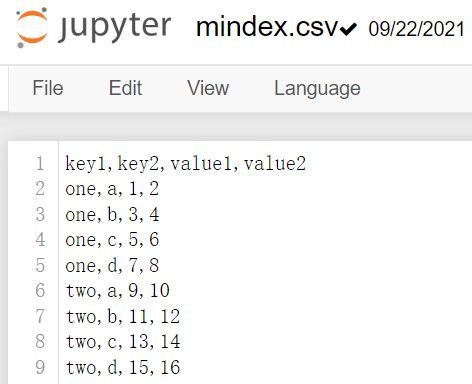

In [24]:
pd.read_csv('data/mindex.csv')

,key1,key2,value1,value2
0,one,a,1,2
1,one,b,3,4
2,one,c,5,6
3,one,d,7,8
4,two,a,9,10
5,two,b,11,12
6,two,c,13,14
7,two,d,15,16


In [25]:
# 同时使用key1,key2作为index
pd.read_csv(
    'data/mindex.csv',
    index_col = ['key1' ,'key2']
)

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [26]:
pd.read_csv(
    'data/mindex.csv',
    index_col = [0,1]
)

value1  value2
key1 key2                
one  a          1       2
     b          3       4
     c          5       6
     d          7       8
two  a          9      10
     b         11      12
     c         13      14
     d         15      16

In [27]:
pd.read_csv(
    'data/mindex.csv',
    index_col = [0,1]
).index

MultiIndex([('one', 'a'),
            ('one', 'b'),
            ('one', 'c'),
            ('one', 'd'),
            ('two', 'a'),
            ('two', 'b'),
            ('two', 'c'),
            ('two', 'd')],
           names=['key1', 'key2'])

In [28]:
pd.read_csv(
    'data/mindex.csv',
    index_col = [1,0]
)

,,value1,value2
key2,key1,,
a,one,1,2
b,one,3,4
c,one,5,6
d,one,7,8
a,two,9,10
b,two,11,12
c,two,13,14
d,two,15,16


### 5.sep 分隔符

    sep = ',' # 默认使用逗号作为读取文件时的分隔符，可以使用自定义的字符串甚至正则表达式作为分隔符，以便处理不规则的数据

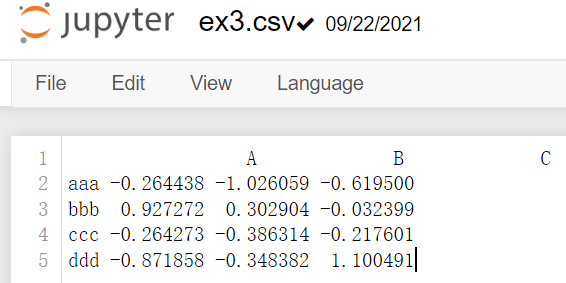

In [29]:
pd.read_csv('data/ex3.csv')

,A B C
0,aaa -0.264438 -1.026059 -0.619500
1,bbb 0.927272 0.302904 -0.032399
2,ccc -0.264273 -0.386314 -0.217601
3,ddd -0.871858 -0.348382 1.100491


In [30]:
pd.read_csv('data/ex3.csv').columns

Index(['            A         B         C'], dtype='object')

In [31]:
pd.read_csv('data/ex3.csv').info()
# 读取出来的数据只有一列

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 1 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0               A         B         C  4 non-null      object
dtypes: object(1)
memory usage: 164.0+ bytes


In [32]:
# 使用空格作为分隔符
pd.read_csv('data/ex3.csv', sep = ' ')
# 没有名称的列会以Unnamed: n进行标识

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,B,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,C
0,aaa,-0.264438,-1.026059,-0.619500,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,bbb,NaN,0.927272,NaN,0.302904,-0.032399,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,ccc,-0.264273,-0.386314,-0.217601,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,ddd,-0.871858,-0.348382,NaN,1.100491,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
pd.read_csv('data/ex3.csv', sep = ' ').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4 entries, 0 to 3
Data columns (total 31 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Unnamed: 0   4 non-null      object 
 1   Unnamed: 1   3 non-null      float64
 2   Unnamed: 2   4 non-null      float64
 3   Unnamed: 3   2 non-null      float64
 4   Unnamed: 4   2 non-null      float64
 5   Unnamed: 5   1 non-null      float64
 6   Unnamed: 6   0 non-null      float64
 7   Unnamed: 7   0 non-null      float64
 8   Unnamed: 8   0 non-null      float64
 9   Unnamed: 9   0 non-null      float64
 10  Unnamed: 10  0 non-null      float64
 11  Unnamed: 11  0 non-null      float64
 12  A            0 non-null      float64
 13  Unnamed: 13  0 non-null      float64
 14  Unnamed: 14  0 non-null      float64
 15  Unnamed: 15  0 non-null      float64
 16  Unnamed: 16  0 non-null      float64
 17  Unnamed: 17  0 non-null      float64
 18  Unnamed: 18  0 non-null      float64
 19  Unnamed: 19 

In [34]:
# 使用正则表达式作为分隔符：使用至少一个空格作为分隔符
pd.read_csv('data/ex3.csv', sep = r'\s+')

,A,B,C
aaa,-0.264438,-1.026059,-0.619500
bbb,0.927272,0.302904,-0.032399
ccc,-0.264273,-0.386314,-0.217601
ddd,-0.871858,-0.348382,1.100491


In [35]:
pd.read_csv('data/ex3.csv', sep = r'\s+').columns

Index(['A', 'B', 'C'], dtype='object')

In [36]:
pd.read_csv('data/ex3.csv', sep = r'\s+').info()

<class 'pandas.core.frame.DataFrame'>
Index: 4 entries, aaa to ddd
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   A       4 non-null      float64
 1   B       4 non-null      float64
 2   C       4 non-null      float64
dtypes: float64(3)
memory usage: 128.0+ bytes


### 6.skiprows  跳过指定的行

    skiprows = int / []  # 跳过指定数量或特定索引的行

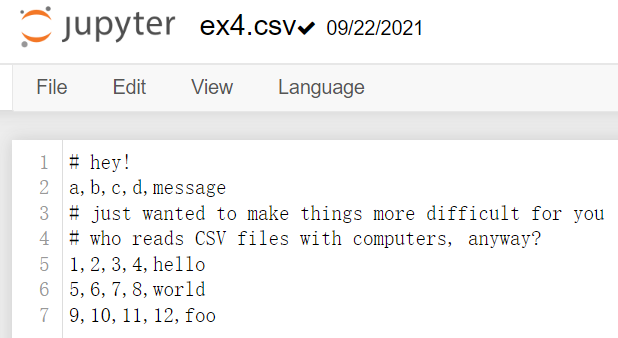

In [37]:
pd.read_csv('data/ex4.csv')

,,,,# hey!
a,b,c,d,message
# just wanted to make things more difficult for you,NaN,NaN,NaN,NaN
# who reads CSV files with computers,anyway?,NaN,NaN,NaN
1,2,3,4,hello
5,6,7,8,world
9,10,11,12,foo


In [38]:
pd.read_csv('data/ex4.csv').info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 6 entries, ('a', 'b', 'c', 'd') to ('9', '10', '11', '12')
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   # hey!  4 non-null      object
dtypes: object(1)
memory usage: 976.0+ bytes


In [39]:
# 跳过第一行
pd.read_csv('data/ex4.csv', skiprows=1)

,a,b,c,d,message
0,# just wanted to make things more difficult fo...,NaN,NaN,NaN,NaN
1,# who reads CSV files with computers,anyway?,NaN,NaN,NaN
2,1,2,3.0,4.0,hello
3,5,6,7.0,8.0,world
4,9,10,11.0,12.0,foo


In [40]:
pd.read_csv('data/ex4.csv', skiprows = 4)
# 跳过前4行

,1,2,3,4,hello
0,5,6,7,8,world
1,9,10,11,12,foo


In [41]:
pd.read_csv('data/ex4.csv', skiprows = [0,2,3])
# 通过索引列表指定要跳过的行

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### 7.comment  指定注释标识

    comment = str, # 用指定的字符串作为注释标识，读取数据时，如果遇到以该字符串开头的行，就跳过读取

In [42]:
pd.read_csv('data/ex4.csv', comment='#')

,a,b,c,d,message
0,1,2,3,4,hello
1,5,6,7,8,world
2,9,10,11,12,foo


### 8.parse_dates 对时间序列索引进行格式化操作

    parse_dates = True # 将数据集中的日期时间索引列设置为日期时间对象，方便进行时间序列分析，但该操作只能针对索引生效，一般需要配合index_col参数进行操作

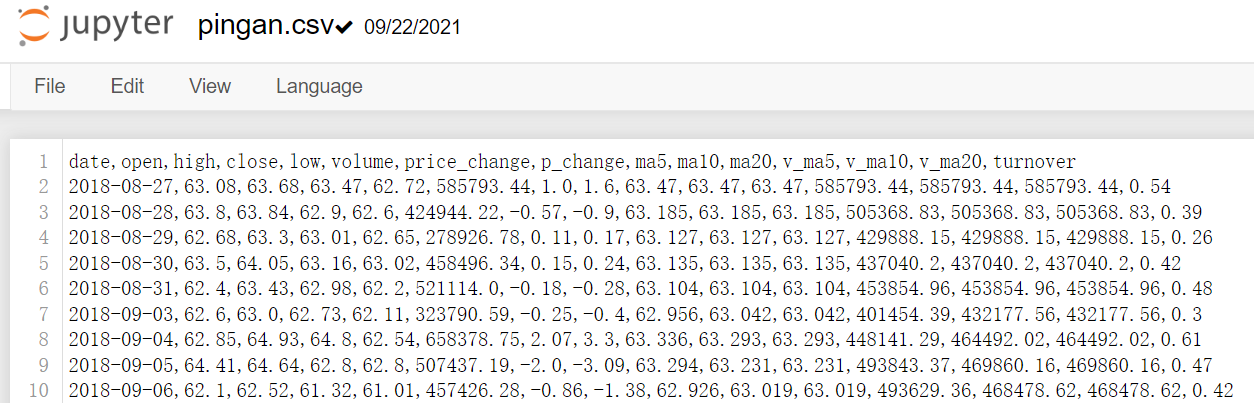

In [43]:
pd.read_csv('data/pingan.csv')

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2018-08-27,63.08,63.68,63.47,62.72,585793.44,1.00,1.60,63.470,63.470,63.470,585793.44,585793.44,585793.44,0.54
1,2018-08-28,63.80,63.84,62.90,62.60,424944.22,-0.57,-0.90,63.185,63.185,63.185,505368.83,505368.83,505368.83,0.39
2,2018-08-29,62.68,63.30,63.01,62.65,278926.78,0.11,0.17,63.127,63.127,63.127,429888.15,429888.15,429888.15,0.26
3,2018-08-30,63.50,64.05,63.16,63.02,458496.34,0.15,0.24,63.135,63.135,63.135,437040.20,437040.20,437040.20,0.42
4,2018-08-31,62.40,63.43,62.98,62.20,521114.00,-0.18,-0.28,63.104,63.104,63.104,453854.96,453854.96,453854.96,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2021-02-09,78.56,78.56,78.13,76.80,914121.88,-0.44,-0.56,78.516,79.307,82.405,1063326.38,1004352.32,1143667.77,0.84
598,2021-02-10,77.90,79.81,79.25,77.49,919686.75,1.12,1.43,79.058,78.928,81.991,978495.13,1028047.22,1120104.94,0.85
599,2021-02-18,81.50,82.86,82.38,80.89,1466782.00,3.13,3.95,79.610,79.074,81.846,988541.98,1068616.70,1124480.35,1.35
600,2021-02-19,82.00,84.56,84.20,81.68,1240617.62,1.82,2.21,80.506,79.586,81.711,1067551.05,1065698.42,1107156.98,1.15


In [44]:
df_pa = pd.read_csv('data/pingan.csv')

In [45]:
df_pa.head()

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2018-08-27,63.08,63.68,63.47,62.72,585793.44,1.00,1.60,63.470,63.470,63.470,585793.44,585793.44,585793.44,0.54
1,2018-08-28,63.80,63.84,62.90,62.60,424944.22,-0.57,-0.90,63.185,63.185,63.185,505368.83,505368.83,505368.83,0.39
2,2018-08-29,62.68,63.30,63.01,62.65,278926.78,0.11,0.17,63.127,63.127,63.127,429888.15,429888.15,429888.15,0.26
3,2018-08-30,63.50,64.05,63.16,63.02,458496.34,0.15,0.24,63.135,63.135,63.135,437040.20,437040.20,437040.20,0.42
4,2018-08-31,62.40,63.43,62.98,62.20,521114.00,-0.18,-0.28,63.104,63.104,63.104,453854.96,453854.96,453854.96,0.48


In [46]:
df_pa.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 602 entries, 0 to 601
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   date          602 non-null    object 
 1   open          602 non-null    float64
 2   high          602 non-null    float64
 3   close         602 non-null    float64
 4   low           602 non-null    float64
 5   volume        602 non-null    float64
 6   price_change  602 non-null    float64
 7   p_change      602 non-null    float64
 8   ma5           602 non-null    float64
 9   ma10          602 non-null    float64
 10  ma20          602 non-null    float64
 11  v_ma5         602 non-null    float64
 12  v_ma10        602 non-null    float64
 13  v_ma20        602 non-null    float64
 14  turnover      602 non-null    float64
dtypes: float64(14), object(1)
memory usage: 70.7+ KB


In [47]:
df_pa1 = pd.read_csv('data/pingan.csv', index_col = 'date')

In [48]:
df_pa1.head()

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2018-08-27,63.08,63.68,63.47,62.72,585793.44,1.00,1.60,63.470,63.470,63.470,585793.44,585793.44,585793.44,0.54
2018-08-28,63.80,63.84,62.90,62.60,424944.22,-0.57,-0.90,63.185,63.185,63.185,505368.83,505368.83,505368.83,0.39
2018-08-29,62.68,63.30,63.01,62.65,278926.78,0.11,0.17,63.127,63.127,63.127,429888.15,429888.15,429888.15,0.26
2018-08-30,63.50,64.05,63.16,63.02,458496.34,0.15,0.24,63.135,63.135,63.135,437040.20,437040.20,437040.20,0.42
2018-08-31,62.40,63.43,62.98,62.20,521114.00,-0.18,-0.28,63.104,63.104,63.104,453854.96,453854.96,453854.96,0.48


In [49]:
df_pa1.index

Index(['2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30', '2018-08-31',
       '2018-09-03', '2018-09-04', '2018-09-05', '2018-09-06', '2018-09-07',
       ...
       '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05', '2021-02-08',
       '2021-02-09', '2021-02-10', '2021-02-18', '2021-02-19', '2021-02-22'],
      dtype='object', name='date', length=602)

In [50]:
# df_pa1['2018']
# 不是时间序列，不能使用时间作为索引截取数据

In [51]:
df_pa2 = pd.read_csv(
    'data/pingan.csv',
    parse_dates = True,
    index_col = 'date'
)

In [52]:
df_pa2.index

DatetimeIndex(['2018-08-27', '2018-08-28', '2018-08-29', '2018-08-30',
               '2018-08-31', '2018-09-03', '2018-09-04', '2018-09-05',
               '2018-09-06', '2018-09-07',
               ...
               '2021-02-02', '2021-02-03', '2021-02-04', '2021-02-05',
               '2021-02-08', '2021-02-09', '2021-02-10', '2021-02-18',
               '2021-02-19', '2021-02-22'],
              dtype='datetime64[ns]', name='date', length=602, freq=None)

In [53]:
df_pa2['2020']
# DataFrame如果想要以行序优先提取数据尽可能使用loc/iloc

KeyError: '2020'

In [54]:
df_pa2.loc['2020']

,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
date,,,,,,,,,,,,,,
2020-01-02,85.90,86.79,86.12,85.88,778252.06,0.66,0.77,85.324,85.053,84.989,533166.66,442058.12,464601.55,0.72
2020-01-03,86.81,86.88,86.20,85.90,594980.00,0.08,0.09,85.678,85.103,85.066,594857.04,468473.90,477223.82,0.55
2020-01-06,85.92,86.87,85.60,85.50,636448.06,-0.60,-0.70,85.854,85.110,85.109,623580.82,496287.79,495440.72,0.59
2020-01-07,86.01,86.46,86.15,85.67,452188.31,0.55,0.64,85.906,85.296,85.234,578780.95,495788.45,495027.11,0.42
2020-01-08,85.98,85.98,85.00,84.50,628053.12,-1.15,-1.33,85.814,85.350,85.304,617984.31,529373.32,511652.74,0.58
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-12-25,83.60,83.60,83.20,81.86,691408.00,-1.00,-1.19,84.690,86.105,88.073,670452.40,622521.09,670267.11,0.64
2020-12-28,83.45,85.19,84.62,82.85,635199.50,1.42,1.71,84.204,85.798,87.802,677545.79,627654.88,625067.26,0.59
2020-12-29,84.95,86.08,85.50,84.69,519315.62,0.88,1.04,84.474,85.718,87.408,584216.99,616276.07,608322.74,0.48


<Axes: xlabel='date'>

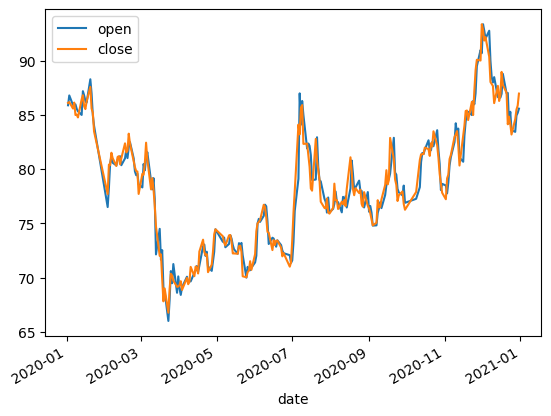

In [55]:
# 观察平安股票在2020年走势
df_pa2.loc['2020'][['open','close']].plot()

In [56]:
# 周五的平均收盘价是多少？
df_pa2[df_pa2.index.weekday == 4].close.mean()

77.54387931034483

### 9.encoding 设定文件的编码

    enconding = ''  # 设定文件的编码，方便读取

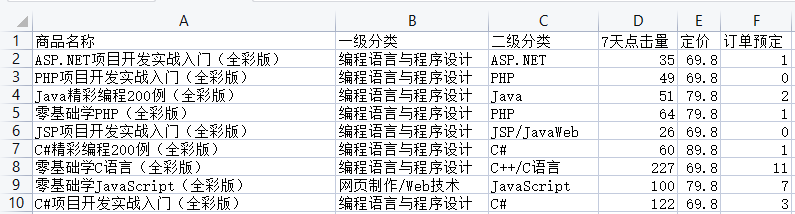

In [57]:
# pd.read_csv('data/JD.csv')

In [58]:
pd.read_csv('data/JD.csv', encoding = 'GBK')

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0
5,C#精彩编程200例（全彩版）,编程语言与程序设计,C#,60,89.8,1
6,零基础学C语言（全彩版）,编程语言与程序设计,C++/C语言,227,69.8,11
7,零基础学JavaScript（全彩版）,网页制作/Web技术,JavaScript,100,79.8,7
8,C#项目开发实战入门（全彩版）,编程语言与程序设计,C#,122,69.8,3
9,C语言项目开发实战入门（全彩版）,编程语言与程序设计,C++/C语言,111,59.8,5


### 10.dtype 设定数据类型

    dtype = 数据类型 # 如果不设定，会自动识别

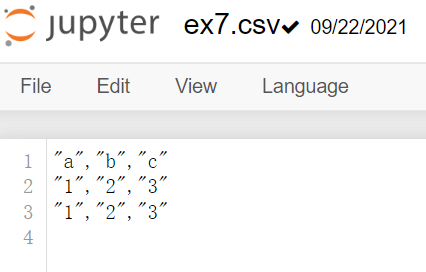

In [59]:
pd.read_csv('data/ex7.csv')

,a,b,c
0,1,2,3
1,1,2,3


In [60]:
pd.read_csv('data/ex7.csv').info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   a       2 non-null      int64
 1   b       2 non-null      int64
 2   c       2 non-null      int64
dtypes: int64(3)
memory usage: 180.0 bytes


In [61]:
pd.read_csv('data/ex7.csv', dtype = str)

,a,b,c
0,1,2,3
1,1,2,3


In [62]:
pd.read_csv('data/ex7.csv', dtype = str).info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   a       2 non-null      object
 1   b       2 non-null      object
 2   c       2 non-null      object
dtypes: object(3)
memory usage: 180.0+ bytes


## 1.2 数据获取-excel

    pd.read_excel(
        io,
        sheet_name: 'str | int | list[IntStrT] | None' = 0,
        header: 'int | Sequence[int] | None' = 0,
        names=None,
        index_col: 'int | Sequence[int] | None' = None,
        usecols=None,
        squeeze: 'bool | None' = None,
        dtype: 'DtypeArg | None' = None,
        engine: "Literal['xlrd', 'openpyxl', 'odf', 'pyxlsb'] | None" = None,
        converters=None,
        true_values: 'Iterable[Hashable] | None' = None,
        false_values: 'Iterable[Hashable] | None' = None,
        skiprows: 'Sequence[int] | int | Callable[[int], object] | None' = None,
        nrows: 'int | None' = None,
        na_values=None,
        keep_default_na: 'bool' = True,
        na_filter: 'bool' = True,
        verbose: 'bool' = False,
        parse_dates=False,
        date_parser=None,
        thousands: 'str | None' = None,
        decimal: 'str' = '.',
        comment: 'str | None' = None,
        skipfooter: 'int' = 0,
        convert_float: 'bool | None' = None,
        mangle_dupe_cols: 'bool' = True,
        storage_options: 'StorageOptions' = None,
    ) -> 'DataFrame | dict[IntStrT, DataFrame]'

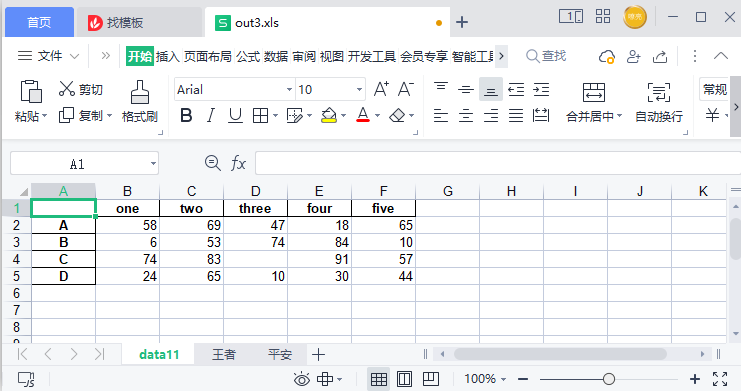

### 1.sheet_name 指定要读取的worksheet

    sheet_name = int / str / []

In [63]:
pd.read_excel('data/out3.xls')
# 默认是读取第一张表的数据

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [ ]:
# 使用索引指定
pd.read_excel('data/out3.xls', sheet_name = 0)

,Unnamed: 0,one,two,three,four,five
0,A,58,69,47.0,18,65
1,B,6,53,74.0,84,10
2,C,74,83,NaN,91,57
3,D,24,65,10.0,30,44


In [ ]:
# 使用索引指定:王者荣耀
pd.read_excel('data/out3.xls', sheet_name = 1)

,Unnamed: 0,ename,cname,title,new_type,hero_type,skin_name,hero_type2,pay_type
0,0,105,廉颇,正义爆轰,0,3,正义爆轰|地狱岩魂,NaN,NaN
1,1,106,小乔,恋之微风,0,2,恋之微风|万圣前夜|天鹅之梦|纯白花嫁|缤纷独角兽,NaN,NaN
2,2,107,赵云,苍天翔龙,0,1,苍天翔龙|忍●炎影|未来纪元|皇家上将|嘻哈天王|白执事|引擎之心,4.0,NaN
3,3,108,墨子,和平守望,0,2,和平守望|金属风暴|龙骑士|进击墨子号,1.0,NaN
4,4,109,妲己,魅力之狐,0,2,魅惑之狐|女仆咖啡|魅力维加斯|仙境爱丽丝|少女阿狸|热情桑巴,NaN,11.0
...,...,...,...,...,...,...,...,...,...
99,99,527,蒙恬,秩序统将,0,1,秩序统将|秩序猎龙将,3.0,NaN
100,100,533,阿古朵,山林之子,0,3,山林之子,6.0,NaN
101,101,536,夏洛特,玫瑰剑士,0,1,玫瑰剑士,NaN,NaN
102,102,528,澜,鲨之猎刃,0,4,鲨之猎刃,NaN,NaN


In [ ]:
# 使用名称读取
pd.read_excel('data/out3.xls', sheet_name = '平安')

,date,open,high,close,low,volume,price_change,p_change,ma5,ma10,ma20,v_ma5,v_ma10,v_ma20,turnover
0,2018-08-27,63.08,63.68,63.47,62.72,585793.44,1.00,1.60,63.470,63.470,63.470,585793.44,585793.44,585793.44,0.54
1,2018-08-28,63.80,63.84,62.90,62.60,424944.22,-0.57,-0.90,63.185,63.185,63.185,505368.83,505368.83,505368.83,0.39
2,2018-08-29,62.68,63.30,63.01,62.65,278926.78,0.11,0.17,63.127,63.127,63.127,429888.15,429888.15,429888.15,0.26
3,2018-08-30,63.50,64.05,63.16,63.02,458496.34,0.15,0.24,63.135,63.135,63.135,437040.20,437040.20,437040.20,0.42
4,2018-08-31,62.40,63.43,62.98,62.20,521114.00,-0.18,-0.28,63.104,63.104,63.104,453854.96,453854.96,453854.96,0.48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
597,2021-02-09,78.56,78.56,78.13,76.80,914121.88,-0.44,-0.56,78.516,79.307,82.405,1063326.38,1004352.32,1143667.77,0.84
598,2021-02-10,77.90,79.81,79.25,77.49,919686.75,1.12,1.43,79.058,78.928,81.991,978495.13,1028047.22,1120104.94,0.85
599,2021-02-18,81.50,82.86,82.38,80.89,1466782.00,3.13,3.95,79.610,79.074,81.846,988541.98,1068616.70,1124480.35,1.35
600,2021-02-19,82.00,84.56,84.20,81.68,1240617.62,1.82,2.21,80.506,79.586,81.711,1067551.05,1065698.42,1107156.98,1.15


In [ ]:
pd.read_excel(
    'data/out3.xls',
    sheet_name=0,
    index_col=0
)

,one,two,three,four,five
A,58,69,47.0,18,65
B,6,53,74.0,84,10
C,74,83,NaN,91,57
D,24,65,10.0,30,44


In [ ]:
# 读取完成后删除第一列
pd.read_excel(
    'data/out3.xls',
    sheet_name = 1
).drop('Unnamed: 0', axis =1)

,ename,cname,title,new_type,hero_type,skin_name,hero_type2,pay_type
0,105,廉颇,正义爆轰,0,3,正义爆轰|地狱岩魂,NaN,NaN
1,106,小乔,恋之微风,0,2,恋之微风|万圣前夜|天鹅之梦|纯白花嫁|缤纷独角兽,NaN,NaN
2,107,赵云,苍天翔龙,0,1,苍天翔龙|忍●炎影|未来纪元|皇家上将|嘻哈天王|白执事|引擎之心,4.0,NaN
3,108,墨子,和平守望,0,2,和平守望|金属风暴|龙骑士|进击墨子号,1.0,NaN
4,109,妲己,魅力之狐,0,2,魅惑之狐|女仆咖啡|魅力维加斯|仙境爱丽丝|少女阿狸|热情桑巴,NaN,11.0
...,...,...,...,...,...,...,...,...
99,527,蒙恬,秩序统将,0,1,秩序统将|秩序猎龙将,3.0,NaN
100,533,阿古朵,山林之子,0,3,山林之子,6.0,NaN
101,536,夏洛特,玫瑰剑士,0,1,玫瑰剑士,NaN,NaN
102,528,澜,鲨之猎刃,0,4,鲨之猎刃,NaN,NaN


## 1.3 数据获取-mysql

在jupyter notebook中安装第三方库

In [ ]:
pip install pymysql -i https://pypi.tuna.tsinghua.edu.cn/simple

Looking in indexes: https://pypi.tuna.tsinghua.edu.cn/simple
Note: you may need to restart the kernel to use updated packages.


### 1.使用pymysql提供对mysql数据库的链接，构建connection对象，使用pymysql.connect方法

    pymysql.connect(
        *,
        user=None,              # 登录mysql服务器的用户名
        password='',             # 登录mysql服务器的密码
        host=None,              # mysql服务器地址，可以是ip，也可以是url
        database=None,           # 数据库名称
        unix_socket=None,
        port=0,                # 服务器端口
        charset='',
        sql_mode=None,
        read_default_file=None,
        conv=None,
        use_unicode=True,
        client_flag=0,
        cursorclass=<class 'pymysql.cursors.Cursor'>,
        init_command=None,
        connect_timeout=10,
        read_default_group=None,
        autocommit=False,
        local_infile=False,
        max_allowed_packet=16777216,
        defer_connect=False,
        auth_plugin_map=None,
        read_timeout=None,
        write_timeout=None,
        bind_address=None,
        binary_prefix=False,
        program_name=None,
        server_public_key=None,
        ssl=None,
        ssl_ca=None,
        ssl_cert=None,
        ssl_disabled=None,
        ssl_key=None,
        ssl_verify_cert=None,
        ssl_verify_identity=None,
        compress=None,
        named_pipe=None,
        passwd=None,
        db=None,
    )
    # 返回一个connection对象
    
### 2.使用pandas.read_sql方法，读取数据库中的数据，返回DataFrame

    pd.read_sql(
        sql,            # 读取数据用的sql语句，select...
        con,            # 用pymysql构建的connection对象
        index_col: 'str | Sequence[str] | None' = None,
        coerce_float: 'bool' = True,
        params=None,
        parse_dates=None,
        columns=None,
        chunksize: 'int | None' = None,
    ) -> 'DataFrame | Iterator[DataFrame]'

In [64]:
import pymysql

ModuleNotFoundError: No module named 'pymysql'

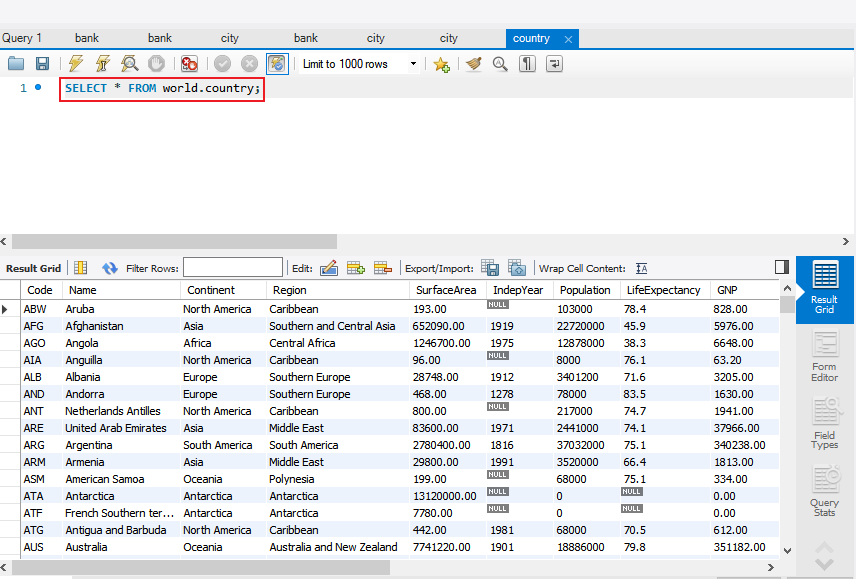

In [65]:
# 创建connection对象
conn_ = pymysql.connect(
    host = '127.0.0.1',     # 本机的mysql服务器地址
    port = 3306,            # 本机的mysql服务器端口
    user = 'root',          # 用户名
    password = '1234'       # 密码
)

NameError: name 'pymysql' is not defined

In [66]:
# 查询数据用的select语句
sql_ = 'SELECT * FROM world.country'

In [67]:
df_country = pd.read_sql(
    sql_,
    con = conn_
)

NameError: name 'conn_' is not defined

In [68]:
df_country.head()

NameError: name 'df_country' is not defined

## 1.4 数据写入 csv/excel

    pd.DataFrame.to_csv(
        self,
        path_or_buf: 'FilePath | WriteBuffer[bytes] | WriteBuffer[str] | None' = None,   # 要写入带路径的文件名
        sep: 'str' = ',',                                            # 分隔符
        na_rep: 'str' = '', 
        float_format: 'str | None' = None,
        columns: 'Sequence[Hashable] | None' = None,
        header: 'bool_t | list[str]' = True,
        index: 'bool_t' = True,                                        # 是否写入索引
        index_label: 'IndexLabel | None' = None,
        mode: 'str' = 'w',
        encoding: 'str | None' = None,                                   # 文件的编码
        compression: 'CompressionOptions' = 'infer',
        quoting: 'int | None' = None,
        quotechar: 'str' = '"',
        line_terminator: 'str | None' = None,
        chunksize: 'int | None' = None,
        date_format: 'str | None' = None,
        doublequote: 'bool_t' = True,
        escapechar: 'str | None' = None,
        decimal: 'str' = '.',
        errors: 'str' = 'strict',
        storage_options: 'StorageOptions' = None,
    ) -> 'str | None'
    
    
    pd.DataFrame.to_excel(
        self,
        excel_writer,                  # 要写入的带路径的工作簿文件名称，尽可能使用'xlsx'格式
        sheet_name: 'str' = 'Sheet1',        # 工作表名称，默认是Sheet1
        na_rep: 'str' = '',
        float_format: 'str | None' = None,
        columns=None,
        header=True,
        index=True,
        index_label=None,
        startrow=0,
        startcol=0,
        engine=None,
        merge_cells=True,
        encoding=None,
        inf_rep='inf',
        verbose=True,
        freeze_panes=None,
        storage_options: 'StorageOptions' = None,
    ) -> 'None'

In [69]:
# 读取王者荣耀表格
df_pvp = pd.read_excel('data/out3.xls', sheet_name = 1)

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [ ]:
df_pvp

,Unnamed: 0,ename,cname,title,new_type,hero_type,skin_name,hero_type2,pay_type
0,0,105,廉颇,正义爆轰,0,3,正义爆轰|地狱岩魂,NaN,NaN
1,1,106,小乔,恋之微风,0,2,恋之微风|万圣前夜|天鹅之梦|纯白花嫁|缤纷独角兽,NaN,NaN
2,2,107,赵云,苍天翔龙,0,1,苍天翔龙|忍●炎影|未来纪元|皇家上将|嘻哈天王|白执事|引擎之心,4.0,NaN
3,3,108,墨子,和平守望,0,2,和平守望|金属风暴|龙骑士|进击墨子号,1.0,NaN
4,4,109,妲己,魅力之狐,0,2,魅惑之狐|女仆咖啡|魅力维加斯|仙境爱丽丝|少女阿狸|热情桑巴,NaN,11.0
...,...,...,...,...,...,...,...,...,...
99,99,527,蒙恬,秩序统将,0,1,秩序统将|秩序猎龙将,3.0,NaN
100,100,533,阿古朵,山林之子,0,3,山林之子,6.0,NaN
101,101,536,夏洛特,玫瑰剑士,0,1,玫瑰剑士,NaN,NaN
102,102,528,澜,鲨之猎刃,0,4,鲨之猎刃,NaN,NaN


In [70]:
# 写入csv
df_pvp.to_csv('rongyao.csv')
# 直接写入时，会将DataFrame的索引也写入到文件中，成为单独的一列

NameError: name 'df_pvp' is not defined

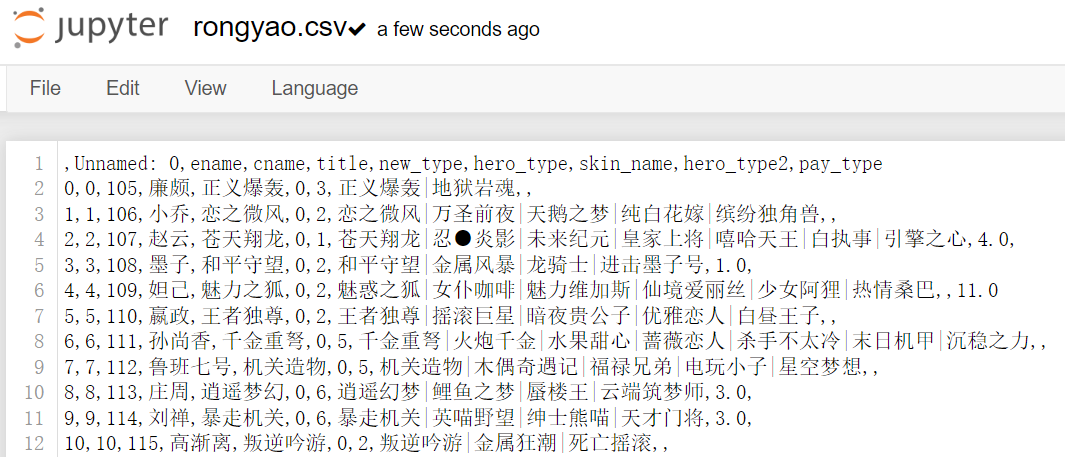

In [71]:
pd.read_csv('rongyao.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'rongyao.csv'

In [ ]:
df_pvp.to_csv('ry1.csv', index = False)
# 写入文件时，不写入index

In [ ]:
pd.read_csv('ry1.csv')

,Unnamed: 0,ename,cname,title,new_type,hero_type,skin_name,hero_type2,pay_type
0,0,105,廉颇,正义爆轰,0,3,正义爆轰|地狱岩魂,NaN,NaN
1,1,106,小乔,恋之微风,0,2,恋之微风|万圣前夜|天鹅之梦|纯白花嫁|缤纷独角兽,NaN,NaN
2,2,107,赵云,苍天翔龙,0,1,苍天翔龙|忍●炎影|未来纪元|皇家上将|嘻哈天王|白执事|引擎之心,4.0,NaN
3,3,108,墨子,和平守望,0,2,和平守望|金属风暴|龙骑士|进击墨子号,1.0,NaN
4,4,109,妲己,魅力之狐,0,2,魅惑之狐|女仆咖啡|魅力维加斯|仙境爱丽丝|少女阿狸|热情桑巴,NaN,11.0
...,...,...,...,...,...,...,...,...,...
99,99,527,蒙恬,秩序统将,0,1,秩序统将|秩序猎龙将,3.0,NaN
100,100,533,阿古朵,山林之子,0,3,山林之子,6.0,NaN
101,101,536,夏洛特,玫瑰剑士,0,1,玫瑰剑士,NaN,NaN
102,102,528,澜,鲨之猎刃,0,4,鲨之猎刃,NaN,NaN


In [ ]:
df_pvp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104 entries, 0 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  104 non-null    int64  
 1   ename       104 non-null    int64  
 2   cname       104 non-null    object 
 3   title       104 non-null    object 
 4   new_type    104 non-null    int64  
 5   hero_type   104 non-null    int64  
 6   skin_name   103 non-null    object 
 7   hero_type2  38 non-null     float64
 8   pay_type    10 non-null     float64
dtypes: float64(2), int64(4), object(3)
memory usage: 7.4+ KB


In [ ]:
# 以hero_type2作为删除缺失值的依据
df_p2 = df_pvp.dropna(subset = ['hero_type2'])

In [ ]:
df_p2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38 entries, 2 to 103
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  38 non-null     int64  
 1   ename       38 non-null     int64  
 2   cname       38 non-null     object 
 3   title       38 non-null     object 
 4   new_type    38 non-null     int64  
 5   hero_type   38 non-null     int64  
 6   skin_name   37 non-null     object 
 7   hero_type2  38 non-null     float64
 8   pay_type    3 non-null      float64
dtypes: float64(2), int64(4), object(3)
memory usage: 3.0+ KB


In [72]:
df_p3 = df_p2.drop('Unnamed: 0', axis = 1)

NameError: name 'df_p2' is not defined

In [73]:
df_p3.info()

NameError: name 'df_p3' is not defined

In [74]:
df_p3.to_csv('p3.csv')

NameError: name 'df_p3' is not defined

In [75]:
pd.read_csv('p3.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'p3.csv'

In [76]:
pd.read_csv('p3.csv').info()
# 读取文件的时候，索引列会被识别为数据列，
# 因此，先写入再读取相当于做了一次reset_index的操作

FileNotFoundError: [Errno 2] No such file or directory: 'p3.csv'

In [ ]:
# 写入excel
df_pvp.to_excel('ry.xls')

C:\Users\admin\AppData\Local\Temp\ipykernel_46600\2316348686.py:2: FutureWarning: As the xlwt package is no longer maintained, the xlwt engine will be removed in a future version of pandas. This is the only engine in pandas that supports writing in the xls format. Install openpyxl and write to an xlsx file instead. You can set the option io.excel.xls.writer to 'xlwt' to silence this warning. While this option is deprecated and will also raise a warning, it can be globally set and the warning suppressed.
  df_pvp.to_excel('ry.xls')


In [77]:
df_pvp.to_excel('ry.xlsx', sheet_name = '王者荣耀')

NameError: name 'df_pvp' is not defined

csv格式在读写效率和磁盘空间占用上都优于excel文件，因此，在没有特殊需求（多个表放在同一个文件中，或者需要使用日期时间格式）时，尽可能使用csv格式进行数据存取

# 2.数据预处理
## 2.1 修改index对象

    pd.DataFrame.rename(
        self,
        mapper: 'Renamer | None' = None,    
        # 要修改的index对象名称的映射，常用字典形式，字典的键是旧的名称，字典的值是新的名称，该参数需要和axis配合使用
        *,
        index: 'Renamer | None' = None,   # 要修改的行名称映射，可以省略axis
        columns: 'Renamer | None' = None,  # 要修改的列名称映射
        axis: 'Axis | None' = None,  # 要修改的轴，0是index，1是columns,默认是index
        copy: 'bool' = True,
        inplace: 'bool' = False,        # 是否本地修改
        level: 'Level | None' = None,    # 起作用的层级
        errors: 'str' = 'ignore',
    ) -> 'DataFrame | None'

In [78]:
df_pvp.head()

NameError: name 'df_pvp' is not defined

In [79]:
df_pvp.drop('Unnamed: 0',axis = 1, inplace = True)

NameError: name 'df_pvp' is not defined

In [80]:
df_pvp

NameError: name 'df_pvp' is not defined

In [81]:
# 将第一行的索引由0改为a
df1 = df_pvp.rename(
    mapper = {0:'a'},
    axis = 0
)

NameError: name 'df_pvp' is not defined

In [82]:
df1.head()

NameError: name 'df1' is not defined

In [83]:
df1.rename(
    index = {
        1:'b',
        2:'c'
    }
)

NameError: name 'df1' is not defined

In [84]:
# 把ename列名称改为编号
df1.rename(
    mapper = {'ename':'编号'},
    axis = 1
)

NameError: name 'df1' is not defined

In [85]:
# 同时修改多列
df2 = df1.rename(
    columns = {
        'cname':'名称',
        'title':'称号'
    }
)

NameError: name 'df1' is not defined

In [86]:
df2.head()

NameError: name 'df2' is not defined

## 2.2 修改列的数据类型

    pd.Series.astype(
        self: 'NDFrameT',
        dtype,                   # 要转换成的数据类型
        copy: 'bool_t' = True,
        errors: 'str' = 'raise',       # 设置为ignore可以忽略转换中出现的错误
    ) -> 'NDFrameT'

In [87]:
df3 = pd.read_excel('data/out3.xls')

ImportError: Missing optional dependency 'xlrd'. Install xlrd >= 2.0.1 for xls Excel support Use pip or conda to install xlrd.

In [ ]:
df3

,Unnamed: 0,one,two,three,four,five
0,A,58,69,47.0,18,65
1,B,6,53,74.0,84,10
2,C,74,83,NaN,91,57
3,D,24,65,10.0,30,44


In [88]:
df3.info()

NameError: name 'df3' is not defined

In [89]:
# 将第一列名称改为ID
df3.rename(
    columns = {
        'Unnamed: 0':'ID'
    },
    inplace = True
)

NameError: name 'df3' is not defined

In [90]:
df3

NameError: name 'df3' is not defined

In [91]:
# 将最后一类的数据类型改为字符串
df3.five.astype(str)
# 返回一个新的Series，不影响原始的数据集

NameError: name 'df3' is not defined

In [92]:
df3.info()

NameError: name 'df3' is not defined

In [93]:
# 在df3中新建一列，存放转换格式之后的数据
df3['fivex'] = df3.five.astype(str)

NameError: name 'df3' is not defined

In [94]:
df3

NameError: name 'df3' is not defined

In [95]:
df3.info()

NameError: name 'df3' is not defined

In [96]:
df3['fivey'] = df3.fivex.astype(int)
# 虽然指定的数据类型是int,但转换之后得到的结果实际上是numpy数据类型

NameError: name 'df3' is not defined

In [97]:
df3.info()

NameError: name 'df3' is not defined

In [98]:
df3

NameError: name 'df3' is not defined

In [99]:
# df3['IDX'] = df3.ID.astype(int)
# 转换数据类型的时候要注意列中是否有无法转换的值，如果有就会报错

In [100]:
df3['IDX'] = df3.ID.astype(int, errors = 'ignore')
# 转换数据类型时，设定erroes = 'ignore'可以忽略转换中出现的错误，但无法正常转换

NameError: name 'df3' is not defined

In [101]:
df3

NameError: name 'df3' is not defined

In [102]:
df3.info()

NameError: name 'df3' is not defined

# 3.数据的分类汇总
## 3.1 数据的直接汇总：直接在数据集上调用聚合函数

In [103]:
# 开启JD数据集
df_jd = pd.read_csv('data/JD.csv', encoding = 'gbk' )

In [104]:
df_jd.head()

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0


In [105]:
df_jd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33 entries, 0 to 32
Data columns (total 6 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   商品名称    33 non-null     object 
 1   一级分类    33 non-null     object 
 2   二级分类    33 non-null     object 
 3   7天点击量   33 non-null     int64  
 4   定价      33 non-null     float64
 5   订单预定    33 non-null     int64  
dtypes: float64(1), int64(2), object(3)
memory usage: 1.7+ KB


In [106]:
df_jd.describe()
# 所有数值型变量（连续变量）的描述性统计分析结果

,7天点击量,定价,订单预定
count,33.000000,33.000000,33.000000
mean,153.696970,78.181818,6.939394
std,214.444994,18.294560,14.099954
min,26.000000,49.800000,0.000000
25%,52.000000,69.800000,1.000000
50%,85.000000,79.800000,2.000000
75%,149.000000,79.800000,8.000000
max,1139.000000,128.000000,79.000000


In [107]:
df_jd.describe(include = 'all')
# 包含分类变量（非数值型的变量）在内的所有变量的描述性统计分析结果

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
count,33,33,33,33.000000,33.000000,33.000000
unique,33,4,14,NaN,NaN,NaN
top,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,C++/C语言,NaN,NaN,NaN
freq,1,24,6,NaN,NaN,NaN
mean,NaN,NaN,NaN,153.696970,78.181818,6.939394
std,NaN,NaN,NaN,214.444994,18.294560,14.099954
min,NaN,NaN,NaN,26.000000,49.800000,0.000000
25%,NaN,NaN,NaN,52.000000,69.800000,1.000000
50%,NaN,NaN,NaN,85.000000,79.800000,2.000000
75%,NaN,NaN,NaN,149.000000,79.800000,8.000000


In [108]:
# 二级分类一共有多少种类别
df_jd.二级分类.describe()
# 结果也是一个Series

count          33
unique         14
top       C++/C语言
freq            6
Name: 二级分类, dtype: object

In [109]:
df_jd.二级分类.describe().index

Index(['count', 'unique', 'top', 'freq'], dtype='object')

In [110]:
df_jd.二级分类.describe().unique
# index和方法名称冲突

<bound method Series.unique of count          33
unique         14
top       C++/C语言
freq            6
Name: 二级分类, dtype: object>

In [111]:
df_jd.二级分类.describe()['unique']
# 不重复的类别数

14

In [112]:
df_jd.二级分类.unique()
# 返回Series中不重复的类别名称构成的数组

array(['ASP.NET', 'PHP', 'Java', 'JSP/JavaWeb', 'C#', 'C++/C语言',
       'JavaScript', 'Android', 'HTML', 'Python', 'WEB前端', 'Oracle',
       'SQL', 'Visual Basic'], dtype=object)

In [113]:
len(df_jd.二级分类.unique())

14

In [114]:
df_jd.二级分类.nunique()
# 不重复的类别数量

14

每种二级分类的商品平均价格是多少？

In [115]:
df_jd.head()

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0


In [116]:
df_jd.定价.mean()
# 所有商品的平均价格

78.18181818181819

In [117]:
# 先筛选，再计算
df_jd[df_jd.二级分类 == 'ASP.NET'].定价.mean()

74.8

In [118]:
df_jd.二级分类.unique()

array(['ASP.NET', 'PHP', 'Java', 'JSP/JavaWeb', 'C#', 'C++/C语言',
       'JavaScript', 'Android', 'HTML', 'Python', 'WEB前端', 'Oracle',
       'SQL', 'Visual Basic'], dtype=object)

In [119]:
for item in df_jd.二级分类.unique():
    print('二级分类中的类别：', item)
    print('该类别的平均价格：', df_jd[df_jd.二级分类 == item].定价.mean())
    print('-'*50)
    # 通过循环遍历筛选出来的不同类别，再针对筛选出来的数据进行聚合运算（汇总）

二级分类中的类别： ASP.NET
该类别的平均价格： 74.8
--------------------------------------------------
二级分类中的类别： PHP
该类别的平均价格： 74.8
--------------------------------------------------
二级分类中的类别： Java
该类别的平均价格： 82.10000000000001
--------------------------------------------------
二级分类中的类别： JSP/JavaWeb
该类别的平均价格： 69.8
--------------------------------------------------
二级分类中的类别： C#
该类别的平均价格： 79.8
--------------------------------------------------
二级分类中的类别： C++/C语言
该类别的平均价格： 68.13333333333334
--------------------------------------------------
二级分类中的类别： JavaScript
该类别的平均价格： 79.8
--------------------------------------------------
二级分类中的类别： Android
该类别的平均价格： 89.6
--------------------------------------------------
二级分类中的类别： HTML
该类别的平均价格： 79.8
--------------------------------------------------
二级分类中的类别： Python
该类别的平均价格： 96.85000000000001
--------------------------------------------------
二级分类中的类别： WEB前端
该类别的平均价格： 49.8
--------------------------------------------------
二级分类中的类别： Oracle
该类别的平均价格： 79.8
----------------

## 3.2 分类汇总
### 1.先分类 groupby

    pd.DataFrame.groupby(
        self,
        by=None,                            # 分组的依据，常用列名称或列名称的列表
        axis: 'Axis' = 0,                      # 轴，当使用列分组时，axis = 0
        level: 'Level | None' = None,              # 层级
        as_index: 'bool' = True,                 # 是否将分组的列生成索引，默认是
        sort: 'bool' = True,
        group_keys: 'bool' = True,
        squeeze: 'bool | lib.NoDefault' = <no_default>,
        observed: 'bool' = False,
        dropna: 'bool' = True,
    ) -> 'DataFrameGroupBy'                      # 返回一个分好组的数据集
    
### 2.后汇总 在groupby的结果上进行汇总操作，调用聚合函数

每种二级分类的商品平均价格是多少？

In [120]:
# 先分类
dfx = df_jd.groupby('二级分类')

In [121]:
dfx

In [122]:
dfx.head()

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0
5,C#精彩编程200例（全彩版）,编程语言与程序设计,C#,60,89.8,1
6,零基础学C语言（全彩版）,编程语言与程序设计,C++/C语言,227,69.8,11
7,零基础学JavaScript（全彩版）,网页制作/Web技术,JavaScript,100,79.8,7
8,C#项目开发实战入门（全彩版）,编程语言与程序设计,C#,122,69.8,3
9,C语言项目开发实战入门（全彩版）,编程语言与程序设计,C++/C语言,111,59.8,5


In [123]:
df_jd.head()

,商品名称,一级分类,二级分类,7天点击量,定价,订单预定
0,ASP.NET项目开发实战入门（全彩版）,编程语言与程序设计,ASP.NET,35,69.8,1
1,PHP项目开发实战入门（全彩版）,编程语言与程序设计,PHP,49,69.8,0
2,Java精彩编程200例（全彩版）,编程语言与程序设计,Java,51,79.8,2
3,零基础学PHP（全彩版）,编程语言与程序设计,PHP,64,79.8,1
4,JSP项目开发实战入门（全彩版）,编程语言与程序设计,JSP/JavaWeb,26,69.8,0


In [124]:
# 通过循环遍历
for item in dfx:
    print(item)
    print(type(item))
    print('-'*50)
# groupby生成的对象是由元组构成的容器，元组的第一项是类别名称，元组的第二项是该类别对应的数据

('ASP.NET',                     商品名称       一级分类     二级分类  7天点击量    定价  订单预定
0   ASP.NET项目开发实战入门（全彩版）  编程语言与程序设计  ASP.NET     35  69.8     1
20      零基础学ASP.NET（全彩版）  编程语言与程序设计  ASP.NET     52  79.8     1)
<class 'tuple'>
--------------------------------------------------
('Android',                     商品名称  一级分类     二级分类  7天点击量     定价  订单预定
10      零基础学Android（全彩版）  移动开发  Android     85   89.8     4
19  Android精彩编程200例（全彩版）  移动开发  Android     32   89.8     1
24  Android项目开发实战入门（全彩版）  移动开发  Android     85   59.8     2
28      Android开发详解（全彩版）  移动开发  Android     59  119.0     0)
<class 'tuple'>
--------------------------------------------------
('C#',                商品名称       一级分类 二级分类  7天点击量    定价  订单预定
5   C#精彩编程200例（全彩版）  编程语言与程序设计   C#     60  89.8     1
8   C#项目开发实战入门（全彩版）  编程语言与程序设计   C#    122  69.8     3
26      零基础学C#（全彩版）  编程语言与程序设计   C#    132  79.8     8)
<class 'tuple'>
--------------------------------------------------
('C++/C语言',                 商品名称       一级分类     二级分类 

In [125]:
list(dfx)

[('ASP.NET',
                      商品名称       一级分类     二级分类  7天点击量    定价  订单预定
  0   ASP.NET项目开发实战入门（全彩版）  编程语言与程序设计  ASP.NET     35  69.8     1
  20      零基础学ASP.NET（全彩版）  编程语言与程序设计  ASP.NET     52  79.8     1),
 ('Android',
                      商品名称  一级分类     二级分类  7天点击量     定价  订单预定
  10      零基础学Android（全彩版）  移动开发  Android     85   89.8     4
  19  Android精彩编程200例（全彩版）  移动开发  Android     32   89.8     1
  24  Android项目开发实战入门（全彩版）  移动开发  Android     85   59.8     2
  28      Android开发详解（全彩版）  移动开发  Android     59  119.0     0),
 ('C#',
                 商品名称       一级分类 二级分类  7天点击量    定价  订单预定
  5   C#精彩编程200例（全彩版）  编程语言与程序设计   C#     60  89.8     1
  8   C#项目开发实战入门（全彩版）  编程语言与程序设计   C#    122  69.8     3
  26      零基础学C#（全彩版）  编程语言与程序设计   C#    132  79.8     8),
 ('C++/C语言',
                  商品名称       一级分类     二级分类  7天点击量    定价  订单预定
  6       零基础学C语言（全彩版）  编程语言与程序设计  C++/C语言    227  69.8    11
  9   C语言项目开发实战入门（全彩版）  编程语言与程序设计  C++/C语言    111  59.8     5
  11      零基础学C++（全彩版）  编

In [126]:
dfx.groups
# 返回一个字典，字典的键是类别名称，字典的值是该类别对应的数据索引的列表

{'ASP.NET': [0, 20], 'Android': [10, 19, 24, 28], 'C#': [5, 8, 26], 'C++/C语言': [6, 9, 11, 18, 29, 31], 'HTML': [14], 'JSP/JavaWeb': [4, 12], 'Java': [2, 13, 16, 23], 'JavaScript': [7], 'Oracle': [25], 'PHP': [1, 3], 'Python': [15, 21, 22, 30], 'SQL': [27], 'Visual Basic': [32], 'WEB前端': [17]}

In [127]:
dfx.定价.mean()
# 返回一个Series

二级分类
ASP.NET         74.800000
Android         89.600000
C#              79.800000
C++/C语言         68.133333
HTML            79.800000
JSP/JavaWeb     69.800000
Java            82.100000
JavaScript      79.800000
Oracle          79.800000
PHP             74.800000
Python          96.850000
SQL             49.800000
Visual Basic    79.800000
WEB前端           49.800000
Name: 定价, dtype: float64

In [128]:
# 先分类，再筛选，最后汇总
df_jd.groupby('二级分类').定价.mean()

二级分类
ASP.NET         74.800000
Android         89.600000
C#              79.800000
C++/C语言         68.133333
HTML            79.800000
JSP/JavaWeb     69.800000
Java            82.100000
JavaScript      79.800000
Oracle          79.800000
PHP             74.800000
Python          96.850000
SQL             49.800000
Visual Basic    79.800000
WEB前端           49.800000
Name: 定价, dtype: float64

In [129]:
# 先分类，再筛选，最后汇总
df_jd.groupby('二级分类')[['定价']].mean()
# 结果是DataFrame

,定价
二级分类,
ASP.NET,74.800000
Android,89.600000
C#,79.800000
C++/C语言,68.133333
HTML,79.800000
JSP/JavaWeb,69.800000
Java,82.100000
JavaScript,79.800000
Oracle,79.800000


In [130]:
# 先筛选，再分类，最后汇总
# df_jd.定价.groupby('二级分类').mean()
# 在筛选时一定要保留用来分类的列，否则会报错

In [131]:
df_jd.定价

0      69.8
1      69.8
2      79.8
3      79.8
4      69.8
5      89.8
6      69.8
7      79.8
8      69.8
9      59.8
10     89.8
11     79.8
12     69.8
13     69.8
14     79.8
15     79.8
16    119.0
17     49.8
18     69.8
19     89.8
20     79.8
21     99.8
22    128.0
23     59.8
24     59.8
25     79.8
26     79.8
27     49.8
28    119.0
29     49.8
30     79.8
31     79.8
32     79.8
Name: 定价, dtype: float64

In [132]:
df_jd[['定价','二级分类']].groupby('二级分类').mean()

,定价
二级分类,
ASP.NET,74.800000
Android,89.600000
C#,79.800000
C++/C语言,68.133333
HTML,79.800000
JSP/JavaWeb,69.800000
Java,82.100000
JavaScript,79.800000
Oracle,79.800000


In [133]:
df_jd[['定价','二级分类']].groupby('二级分类').mean().index

Index(['ASP.NET', 'Android', 'C#', 'C++/C语言', 'HTML', 'JSP/JavaWeb', 'Java',
       'JavaScript', 'Oracle', 'PHP', 'Python', 'SQL', 'Visual Basic',
       'WEB前端'],
      dtype='object', name='二级分类')

In [134]:
df_jd.groupby('二级分类', as_index = False)['定价'].mean().rename(columns = {'定价':'平均价格'})
# 不将分组的列做为索引

,二级分类,平均价格
0,ASP.NET,74.800000
1,Android,89.600000
2,C#,79.800000
3,C++/C语言,68.133333
4,HTML,79.800000
5,JSP/JavaWeb,69.800000
6,Java,82.100000
7,JavaScript,79.800000
8,Oracle,79.800000
9,PHP,74.800000


In [135]:
df_jd.groupby('二级分类', as_index = False)[['定价']].mean().index

RangeIndex(start=0, stop=14, step=1)

每个二级分类下商品的数量

In [136]:
df_jd.groupby('二级分类').定价.count()

二级分类
ASP.NET         2
Android         4
C#              3
C++/C语言         6
HTML            1
JSP/JavaWeb     2
Java            4
JavaScript      1
Oracle          1
PHP             2
Python          4
SQL             1
Visual Basic    1
WEB前端           1
Name: 定价, dtype: int64

In [137]:
df_jd.groupby('二级分类').定价.count().sort_values(ascending = False)
# 观察一个分类变量中，每个类别的数量

二级分类
C++/C语言         6
Android         4
Java            4
Python          4
C#              3
ASP.NET         2
JSP/JavaWeb     2
PHP             2
HTML            1
JavaScript      1
Oracle          1
SQL             1
Visual Basic    1
WEB前端           1
Name: 定价, dtype: int64

In [138]:
df_jd.二级分类.value_counts()
# 值统计，返回按降序排列的，分类变量中各类别的数量，结果是一个Series

二级分类
C++/C语言         6
Java            4
Android         4
Python          4
C#              3
ASP.NET         2
PHP             2
JSP/JavaWeb     2
JavaScript      1
HTML            1
WEB前端           1
Oracle          1
SQL             1
Visual Basic    1
Name: count, dtype: int64

二级分类中，每个类别的商品，占总体的百分比是多少？

In [139]:
df_jd.二级分类.count()
# 一共有多少种商品

33

In [140]:
df_jd.二级分类.value_counts() / df_jd.二级分类.count()
# 每种类别的频数占比

二级分类
C++/C语言         0.181818
Java            0.121212
Android         0.121212
Python          0.121212
C#              0.090909
ASP.NET         0.060606
PHP             0.060606
JSP/JavaWeb     0.060606
JavaScript      0.030303
HTML            0.030303
WEB前端           0.030303
Oracle          0.030303
SQL             0.030303
Visual Basic    0.030303
Name: count, dtype: float64

In [141]:
?pd.Series.value_counts

Signature:
pd.Series.value_counts(
    self,
    normalize: 'bool' = False,
    sort: 'bool' = True,
    ascending: 'bool' = False,
    bins=None,
    dropna: 'bool' = True,
) -> 'Series'
Docstring:
Return a Series containing counts of unique values.

The resulting object will be in descending order so that the
first element is the most frequently-occurring element.
Excludes NA values by default.

Parameters
----------
normalize : bool, default False
    If True then the object returned will contain the relative
    frequencies of the unique values.
sort : bool, default True
    Sort by frequencies when True. Preserve the order of the data when False.
ascending : bool, default False
    Sort in ascending order.
bins : int, optional
    Rather than count values, group them into half-open bins,
    a convenience for ``pd.cut``, only works with numeric data.
dropna : bool, default True
    Don't include counts of NaN.

Returns
-------
Series

See Also
--------
Series.count: Number of non-

In [142]:
df_jd.二级分类.value_counts(normalize = True)
# 标准化：计算各类别的百分比

二级分类
C++/C语言         0.181818
Java            0.121212
Android         0.121212
Python          0.121212
C#              0.090909
ASP.NET         0.060606
PHP             0.060606
JSP/JavaWeb     0.060606
JavaScript      0.030303
HTML            0.030303
WEB前端           0.030303
Oracle          0.030303
SQL             0.030303
Visual Basic    0.030303
Name: proportion, dtype: float64

<Axes: ylabel='proportion'>

C:\Users\hechang\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 35821 (\N{CJK UNIFIED IDEOGRAPH-8BED}) missing from current font.
  func(*args, **kwargs)
C:\Users\hechang\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 35328 (\N{CJK UNIFIED IDEOGRAPH-8A00}) missing from current font.
  func(*args, **kwargs)
C:\Users\hechang\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 21069 (\N{CJK UNIFIED IDEOGRAPH-524D}) missing from current font.
  func(*args, **kwargs)
C:\Users\hechang\AppData\Roaming\Python\Python311\site-packages\IPython\core\events.py:93: UserWarning: Glyph 31471 (\N{CJK UNIFIED IDEOGRAPH-7AEF}) missing from current font.
  func(*args, **kwargs)
C:\Users\hechang\AppData\Roaming\Python\Python311\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 35821 (\N{CJK UNIFIED IDEOGRAPH-8BED}) missing from current font.
  fig.canvas.print_

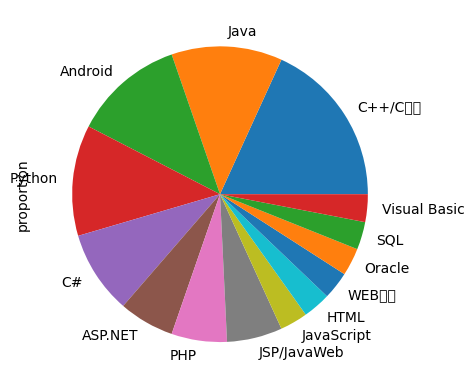

In [143]:
df_jd.二级分类.value_counts(normalize = True).plot(kind = 'pie')